In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

#### Using pd.date_range(start,end,periods,freq)

In [15]:
# Create the range of dates
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate the dates 
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


# Time series transformation

<ol>
<li> Parse string dates and convert to datetime64 </li>
<li> After convert to datetime64, set index using nama_data.set_index('nama_tabel',inplace:True/False)
<li> Check again the data using nama_data.info()
</ol>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None
               ozone       pm25        co
date                                     
1999-07-01  0.012024  20.000000  1.300686
1999-07-02  0.027699  23.900000  0.958194
1999-07-03  0.043969  36.700000  1.194444
1999-07-04  0.035162  39.000000  1.081548
1999-07-05  0.038359  28.171429  0.939583


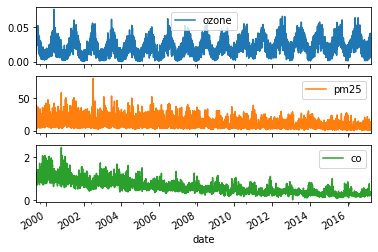

In [43]:
data = pd.read_csv('nyc.csv')
# Convert date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
# Inplace don't create index copy
data.set_index('date',inplace=True)
print(data.info())
print(data.head())

# Plot the data
# subplots = biar data tabel di plot secara terpisah bukan 1-1
data.plot(subplots=True)
plt.show()

# Case : Compare annual stock price trends



price
date             
2013-01-02  20.08
2013-01-03  19.78
2013-01-04  19.86
2013-01-07  19.40
2013-01-08  19.66


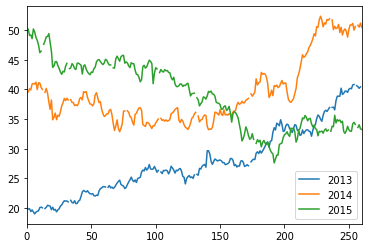

In [18]:
yahoo = pd.read_csv('yahoo.csv')

# Set to datetime and set the date to the index
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date',inplace=True)
print(yahoo.head())

# Create empty dataframe
prices = pd.DataFrame()

# Select each year data and concatenate with prices
# Partial string indexing search use loc to filter desirable results
for year in ['2013','2014','2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price':year},inplace=True)
    prices = pd.concat([prices,price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

# Set and change time series frequency

DateTimeIndex doesn't have frequency information. Set it using .asfreq() to set the frequency

nama_data.asfreq()
Where :
<li> ('D') = Daily </li>
<li> ('B') = Business day </li>

after we use asfreq it's called Upsampling

<li> Upsampling : Higher frequency implies new dates -> missing data </li>

## Find missing value using isnull()

<p>nama_data[nama_data.nama_table.isnull()]</p>

# Moving data between past & future using .shift()

.shift() = move all data in a series or DF into past or future

nama_data.nama_tabel.shift(periods=)
<li>If periods - = lagged </li>
<li>If periods + = shifted </li>

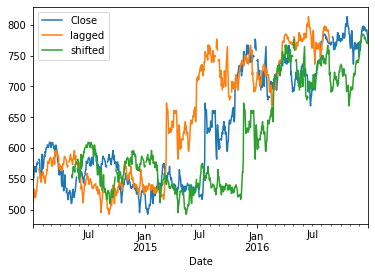

In [3]:
# Read data, Parse date, and set index to the date
google = pd.read_csv('google.csv', parse_dates=['Date'],index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create lagged and shifted in 3 months
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot
google.plot()
plt.show()

### Calculating stock price changes by using .diff()

Perbedaan nilai untuk dua periode yang berdekatan
 
<li> .diff(): built-in time-series change </li>
<li> Xt - (Xt-1)


Example : calculate absolute changes from current and shifted prices, and compare the result to the function 

<ol>
<li> Create shifted date </li>
<li> Substract using .sub() </li>
<li> Get X days difference using .diff() </li>
</ol>

EX:

nama_data.nama_tabel.sub(nama_data.tabel_shifted_sebelumnya)
nama_data.nama_tabel.diff(periods=X)


In [8]:
# Created shifted_30 here
yahoo = pd.read_csv('yahoo.csv')
print(yahoo.head())
# Set to datetime and set the date to the index
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date',inplace=True)

# Create shifted 30
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Substract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get 30 day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)
print(yahoo.tail())

# Show the value counts difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

date  price
0  2013-01-02  20.08
1  2013-01-03  19.78
2  2013-01-04  19.86
3  2013-01-07  19.40
4  2013-01-08  19.66
            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


# Plotting multi-period returns using .pct_change()

.pct_change(periods=x) = percent change

multiply by 100 to get same result as before :
nama_data.nama_tabel.pct_change().mul(100)

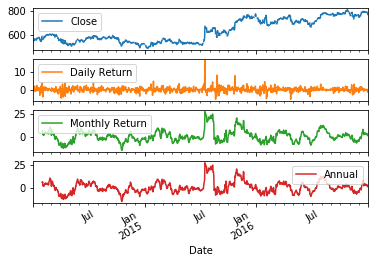

In [10]:
# Read data, Parse date, and set index to the date
google = pd.read_csv('google.csv', parse_dates=['Date'],index_col='Date')

# Daily return
google['Daily Return'] = google.Close.pct_change(periods=1).mul(100)

# Monthly return
google['Monthly Return'] = google.Close.pct_change(periods=30).mul(100)

# Annual return
google['Annual'] = google.Close.pct_change(periods=30).mul(100)

# Plot
google.plot(subplots=True)
plt.show()

# Comparing stock performance

<li> Stock price is hard to compare due to different levels. </li>
<li> Solution: normalize price series to start at 100 </li>
<li> Divide all price by first price in series, then multiply by 100 </li>


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


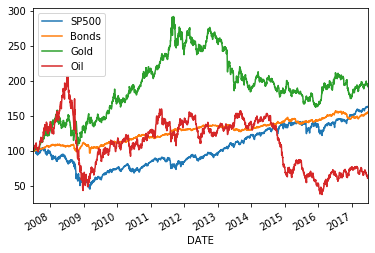

In [13]:
# Compare the performance of several asset classes

prices = pd.read_csv('asset_classes.csv',parse_dates=['DATE'],index_col='DATE')

print(prices.info())

# Create first price variable using iloc[0]
first_price = prices.iloc[0]

# Divide the price
normalized = prices.div(first_price).mul(100)

# Plot
normalized.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


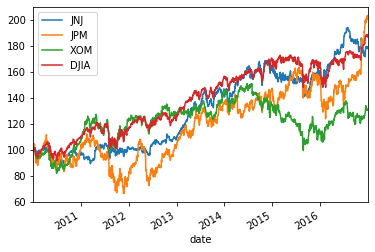

In [15]:
# Comparing stock prices with a benchmark

stocks = pd.read_csv('nyse.csv',parse_dates=['date'],index_col='date')
dow_jones = pd.read_csv('dow_jones.csv',parse_dates=['date'],index_col='date')

# Concatenate the data
data = pd.concat([stocks,dow_jones],axis=1)
print(data.info())

# Divide the data by the first price, multiply by 100, plot the results
data.div(data.iloc[0]).mul(100).plot()
plt.show()

## Plot performance difference vs benchmark index

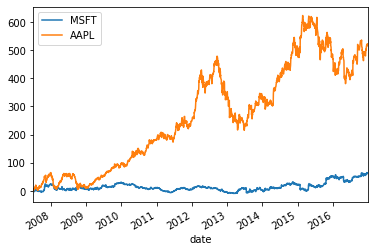

In [23]:
tickers = ['MSFT','AAPL']

stocks = pd.read_csv('msft_aapl.csv',parse_dates=['date'],index_col='date')

sp500 = pd.read_csv('sp500.csv',parse_dates=['date'],index_col='date')

# Concatenate stocks and sp500 and drop all missing values using .dropna
data = pd.concat([stocks,sp500],axis=1).dropna()

# Normalize the data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'],axis=0).plot()
plt.show()

# Changing the frequency: resampling

By using .asfreq() it will affects the data. How to fix it? resampling.

<li>Upsampling : fill or interpolate the missing data</li>
<li>Downsampling : aggregate existing data </li>

Upsampling methods : 
<li> bfill: Backfill. Fill the data from the last value  </li>
<li> ffill: Forward fill. Fill the data from the future atau paling atas </li> 

.reindex() = adjust data frame to new index

In [26]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates
monthly_dates = pd.date_range(start=start,end=end,freq='M')
monthly = pd.Series(data=[1,2],index=monthly_dates)
print(monthly)

# Create weekly_dates
weekly_dates = pd.date_range(start=start,end=end,freq='W')

# print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates,method='bfill'))
print(monthly.reindex(weekly_dates,method='ffill'))

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


## Case : Create weekly from monthly unemployment data

UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
...            ...
2017-04-02     4.3
2017-04-09     4.3
2017-04-16     4.3
2017-04-23     4.3
2017-04-30     4.3

[905 rows x 1 columns]
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0
...            ...
2017-04-02     4.4
2017-04-09     4.4
2017-04-16     4.4
2017-04-23     4.4
2017-04-30     4.4

[905 rows x 1 columns]


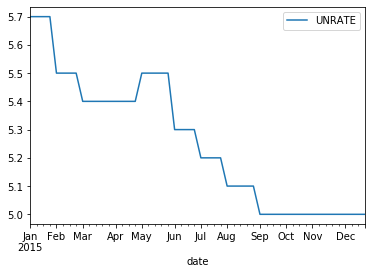

In [33]:
# Import data here
data = pd.read_csv('unemployment.csv', parse_dates=['date'],index_col='date')

# Create weekly with bfill & ffill method
data_weekly = data.asfreq('W')
print(data_weekly.head())

data_weekly_bfill = data.asfreq('W',method='bfill')
print(data_weekly_bfill)

data_weekly_ffill = data.asfreq('W',method='ffill')
print(data_weekly_ffill)

# Plot 
data_weekly_ffill.loc['2015'].plot()
plt.show()

# Upsampling & interpolation with .resample()

.resample() similar to .groupby()

Groups data within resampling period and applies one or several methods to each group. it takes result from this method and assign new date within the resampling period. The new date determined from start,end,custom date.

When Upsampling, there will be more resampling periods than data points.

Downsampling = there are more data points than resampling periods

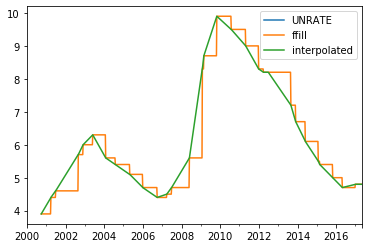

In [39]:
# Use interpolation to create weekly employment data

monthly = pd.read_csv('unemployment.csv', parse_dates=['date'],index_col='date')

# Create weekly dates using pd.date_range and .min & .max as index start & end.
weekly_dates = pd.date_range(start=monthly.index.min(),end=monthly.index.max(),freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns to weekly.UNRATE
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot
weekly.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


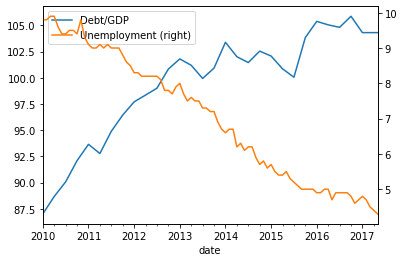

In [41]:
# Interpolate debt/GDP and compare to unemployment

# Import & inspect data here
data = pd.read_csv('debt_unemployment.csv',parse_dates=['date'],index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB


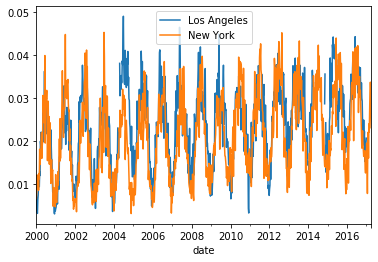

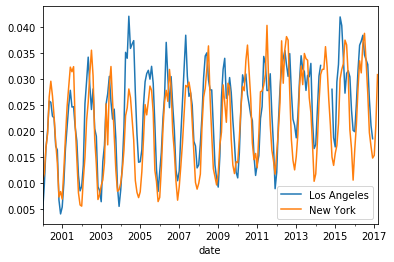

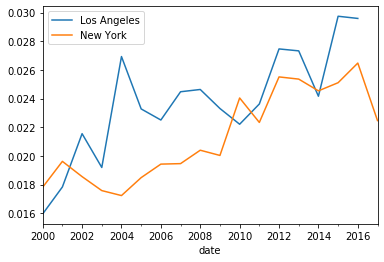

In [45]:
# Compare weekly, monthly and annual ozone trends for NYC & LA

# Import and inspect data here
ozone = pd.read_csv('ozone.csv',parse_dates=['date'],index_col='date')
ozone.info()

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()


# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()


# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None


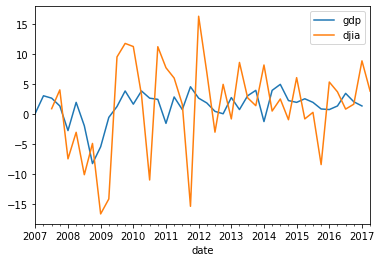

In [46]:
# Compare quarterly GDP growth rate and stock returns

# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv',parse_dates=['date'],index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('djia.csv',parse_dates=['date'],index_col='date')
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)

data.columns= ['gdp','djia']
data.plot()
plt.show()





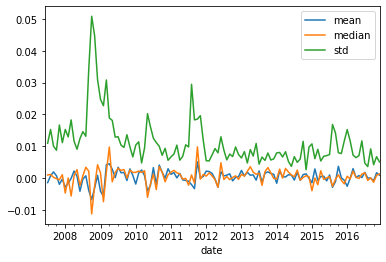

In [47]:
# Visualize monthly mean, median and standard deviation of S&P500 returns

# Import data here
sp500 = pd.read_csv('sp500.csv',parse_dates=['date'],index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here
stats.plot()
plt.show()



# Windows functions in pandas 

Windows functions = calculate metrics for the data inside the windows. Then, the results create new time series.

2 types of windows :
<li> Rolling : same size, sliding </li>
<li> Expanding : contain all prior values </li>
